# Project Title : **Predicting Loan Replayment Risk**
---
## Group Number  : **Group 13**

##### Group Members : 
* **EG/2020/3990 - Jayasooriya L.P.M.   - jayasooriya_lpm_e22@engug.ruh.ac.lk**
* **EG/2020/4040 - Lakpahana A.G.S.     - lakpahana_ags_e22@engug.ruh.ac.lk**

#### keggle Dataset Link : https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior

----

### **Importing Libraries**

In [ ]:
#importing pandas library to read csv file and to create dataframe
import pandas as pd

import seaborn as sns

#### **Loading data from the csv file**

In [63]:
#creating a dataframe from the csv file
df = pd.read_csv('data/TrainingData.csv')

# Data Preprocessing

#### **Checking the data from the file**

In [65]:
print(df)

            Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_

In [5]:
#checking the dataframe
df.head()

#note - looks like there are some different format values in city column
#note - looks like there are some different format values in state column ( underscores)
#note - want to check all profession has underscores or not

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


#### **Checking the shape of the dataframe**

In [66]:
#checking the shape of the dataframe. shape means number of rows and columns
df.shape

(252000, 13)

#### **Checking the data types of the columns**

In [8]:
#checking the data types of the columns
df.dtypes

#there are 6 columns with object data type. we may need to convert them to numeric data type.

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

#### **Checking the missing values in the dataframe**

In [67]:
#check for missing values
df.isnull().sum()

#there are no missing values in the dataframe,so we can proceed further

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
# Generate Heap Map to check null values
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), yticklabels=True, cbar=False, cmap='viridis')
plt.xlabel('Columns with missing values')
plt.ylabel('Rows with missing values')
plt.title('Heap Map of null values in the dataframe')
plt.show()
#there are no missing values in the dataframe,so we can proceed further

In [10]:
#for easy access, we can rename the columns

df.columns = ['id', 'income', 'age', 'experience', 'marital_status', 'house_ownership', 'car_ownership', 'profession', 'city', 'state', 'current_job_years', 'current_house_years', 'risk_flag']

#make all the data in lower case

df['marital_status'] = df['marital_status'].str.lower()
df['house_ownership'] = df['house_ownership'].str.lower()
df['car_ownership'] = df['car_ownership'].str.lower()
df['profession'] = df['profession'].str.lower()
df['city'] = df['city'].str.lower()
df['state'] = df['state'].str.lower()


df.head()

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303834,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,technical_writer,alappuzha,kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,software_developer,bhubaneswar,odisha,2,12,1
4,5,5768871,47,11,single,rented,no,civil_servant,tiruchirappalli[10],tamil_nadu,3,14,1


In [11]:
#there are some unformated data in the city and state column.
# we need to format them first  before checking for duplicates
#otherwise we may get wrong results

df['city']=df['city'].str.replace(r'\[.*\]', '', regex=True)
df['state']=df['state'].str.replace(r'\[.*\]', '', regex=True)



df.head()

,id,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303834,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,technical_writer,alappuzha,kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,software_developer,bhubaneswar,odisha,2,12,1
4,5,5768871,47,11,single,rented,no,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


In [12]:
#check for duplicate rows
df.duplicated().sum()
#no duplicate rows therefore no need to drop duplicate rows

0

In [13]:
#first we are going to remove the id column as it is not required for our analysis
df.drop('id',axis=1,inplace=True)

#checking the dataframe
df.head()



,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13,0
2,3991815,66,4,married,rented,no,technical_writer,alappuzha,kerala,4,10,0
3,6256451,41,2,single,rented,yes,software_developer,bhubaneswar,odisha,2,12,1
4,5768871,47,11,single,rented,no,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


In [14]:
#now checking the data 
df.describe()

#in here we can understand 
#1. there are no missing values in the dataframe


,income,age,experience,current_job_years,current_house_years,risk_flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [15]:
# lets plot all the columns to understand the data distribution
import matplotlib.pyplot as plt
import seaborn as sns

#draw distribution plot for Income	Age	Experience	CURRENT_JOB_YRS	CURRENT_HOUSE_YRS	Risk_Flag the numer columns using subplots

# plt.figure(figsize=(20,25),facecolor='white')
# plotnumber=1
# columnarray=['income','age','experience','current_job_years','current_house_years','risk_flag']
# for column in columnarray:
#     if plotnumber<=6:
#         ax=plt.subplot(3,2,plotnumber)
#         sns.distplot(df[column])
#         plt.xlabel(column,fontsize=20)
#     plotnumber+=1
# plt.tight_layout()

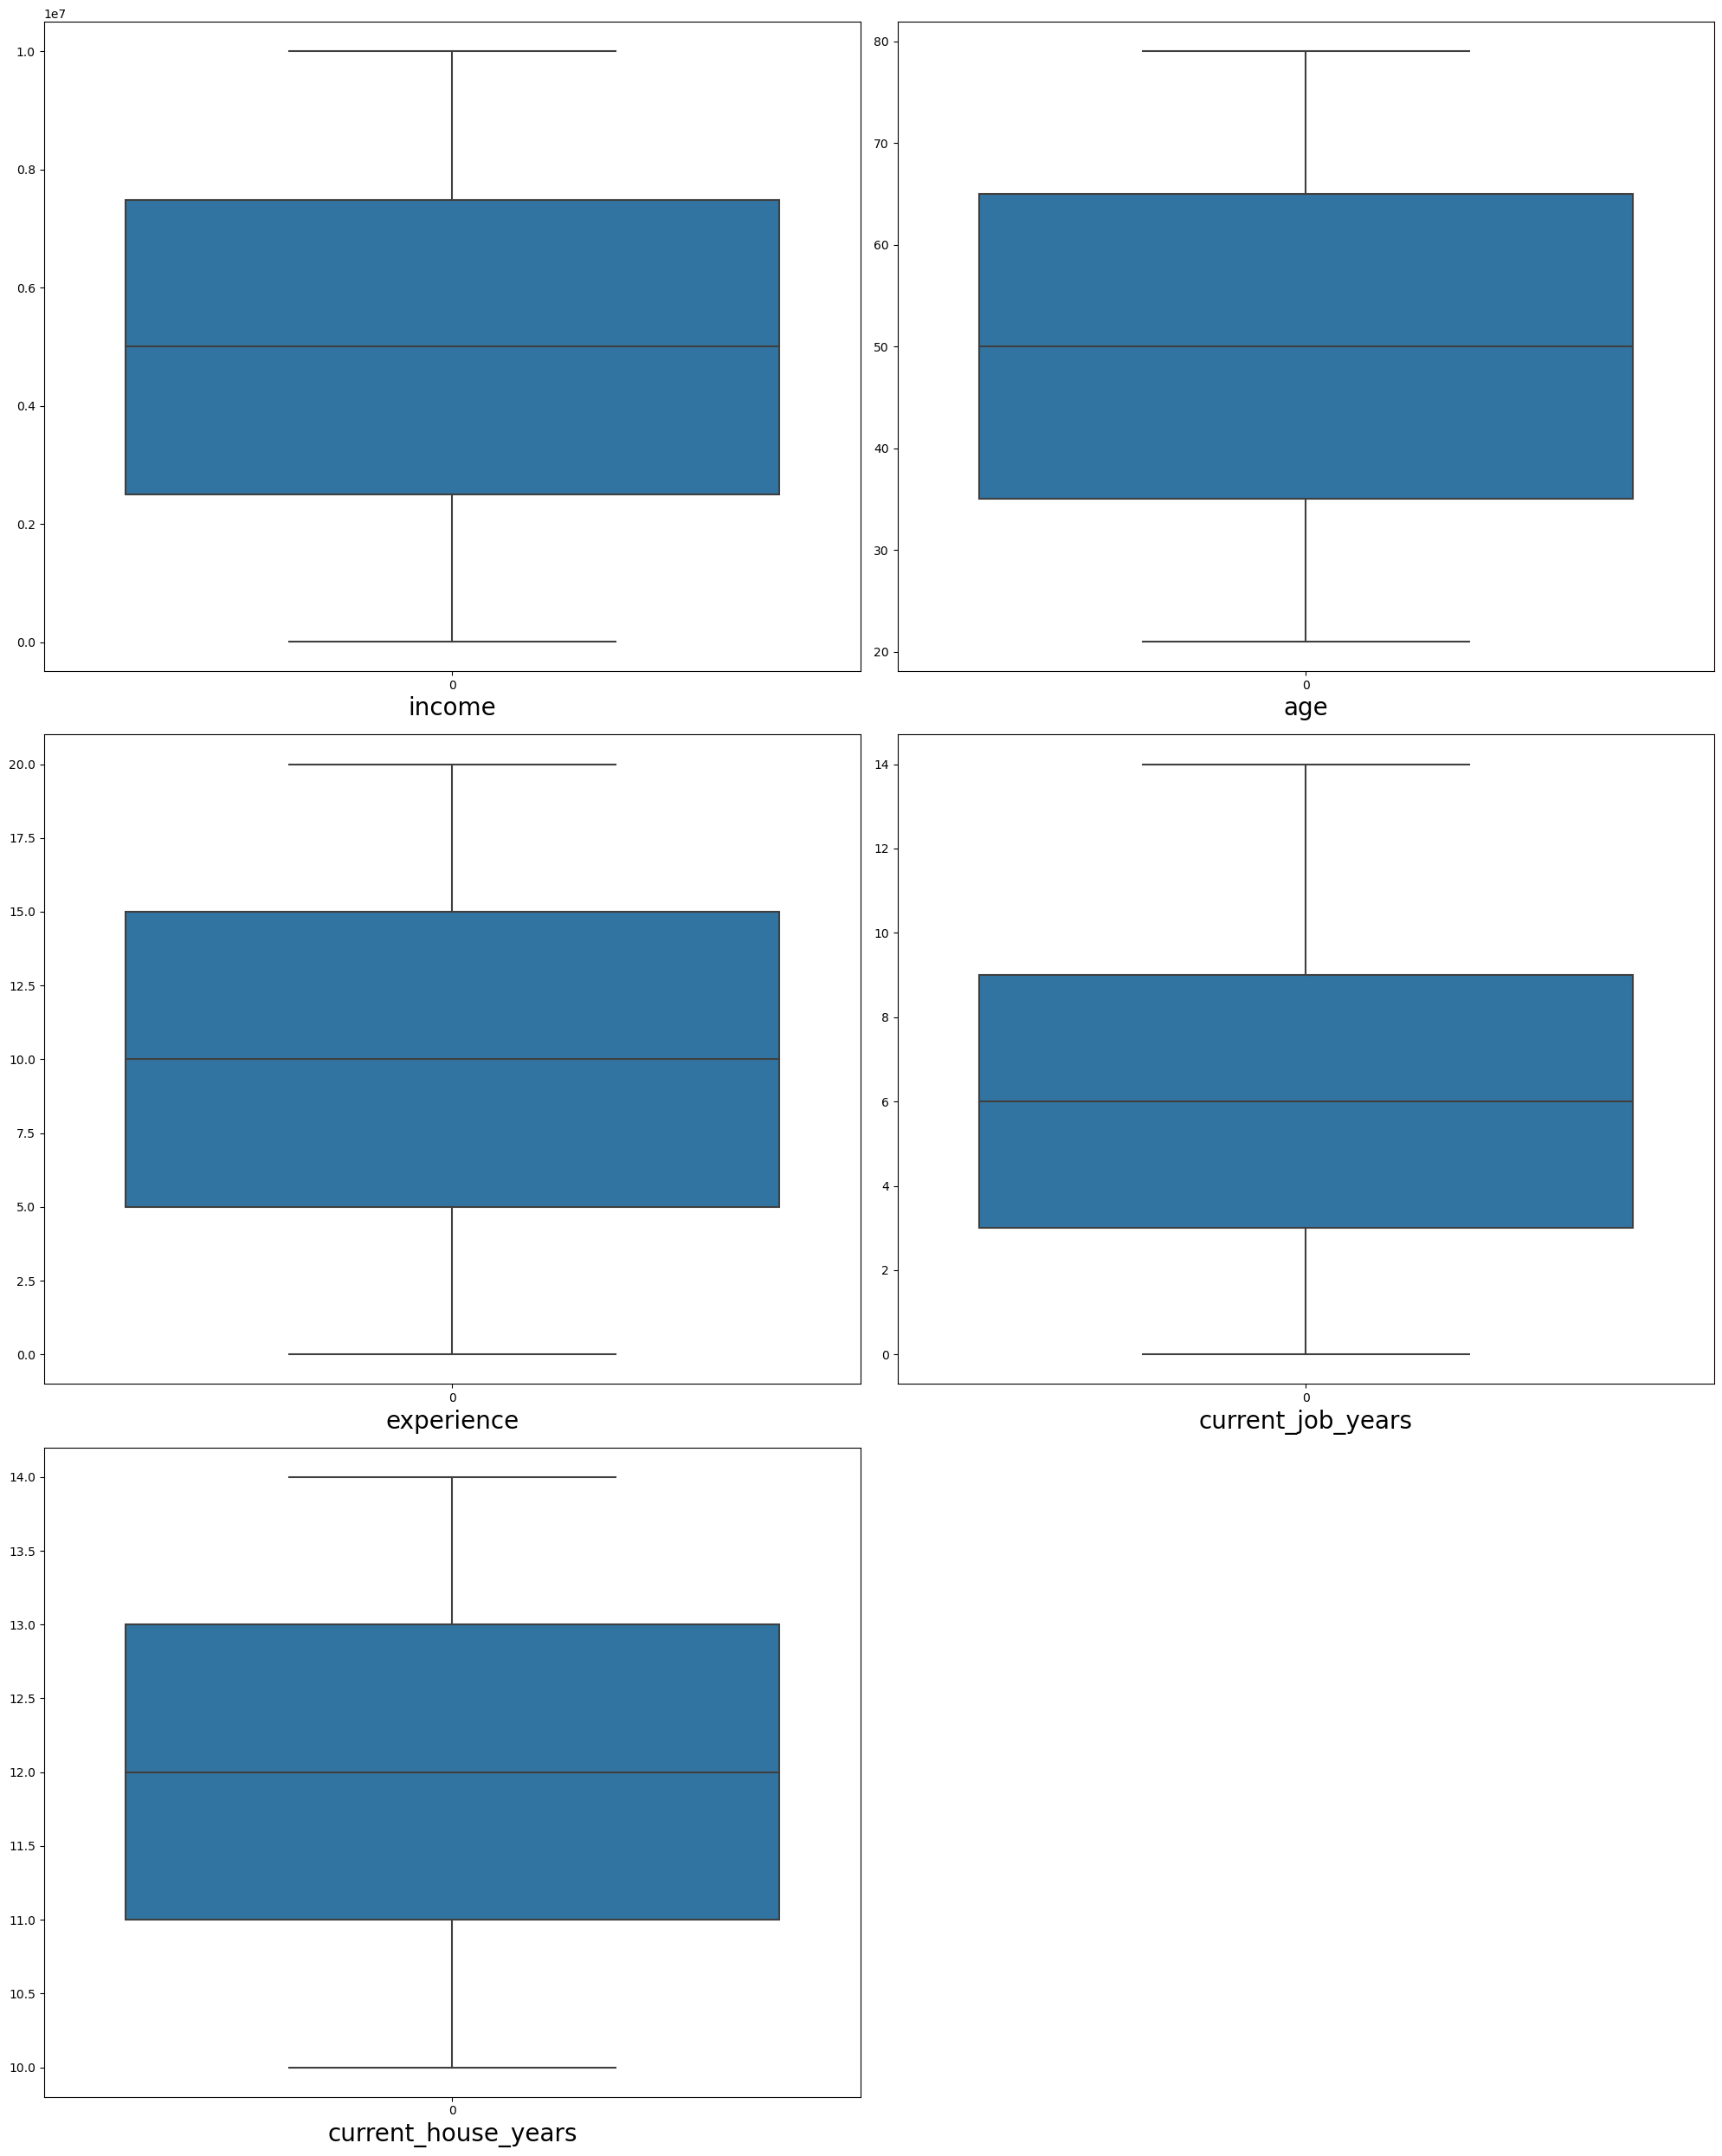

In [16]:
#there are no outliers in the data
#but risk flag is imbalanced

#checking all the columns for outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
columnarray=['income','age','experience','current_job_years','current_house_years']
for column in columnarray:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1   
plt.tight_layout()

#there are no outliers in the data

In [17]:
#checking columns without numerical values

df['marital_status'].value_counts()

#note - there are 2 different values in Married/Single column. we need to convert them to numeric values
#note - we use married = 1 and single = 0
#note - we use married as 1 because sometimes it may be bias towards single as there are more single people than married people.

marital_status
single     226272
married     25728
Name: count, dtype: int64

In [18]:
df['marital_status'].replace({'single':0,'married':1},inplace=True)
df.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,7574516,40,10,0,rented,no,software_developer,parbhani,maharashtra,9,13,0
2,3991815,66,4,1,rented,no,technical_writer,alappuzha,kerala,4,10,0
3,6256451,41,2,0,rented,yes,software_developer,bhubaneswar,odisha,2,12,1
4,5768871,47,11,0,rented,no,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


In [19]:
df['car_ownership'].value_counts()

car_ownership
no     176000
yes     76000
Name: count, dtype: int64

In [20]:
#note - there are 2 different values in car_ownership column. we need to convert them to numeric values
#note - we use yes = 1 and no = 0
#note - we use yes as 1 because sometimes it may be bias towards no as there are more no people than yes people.

df['car_ownership'].replace({'no':0,'yes':1},inplace=True)
df.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,rented,0,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,7574516,40,10,0,rented,0,software_developer,parbhani,maharashtra,9,13,0
2,3991815,66,4,1,rented,0,technical_writer,alappuzha,kerala,4,10,0
3,6256451,41,2,0,rented,1,software_developer,bhubaneswar,odisha,2,12,1
4,5768871,47,11,0,rented,0,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


In [21]:
df['house_ownership'].value_counts()

#note - there are 3 different values in House_Ownership column. we need to convert them to numeric values


house_ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

In [22]:
#we are going to use logistic regression and descion trees for our analysis

#for logistic regression its better to convert the categorical values to numeric values using one hot encoding because it will not bias the model. this is because logistic regression is affected by the magnitude of the values
#for decision trees its better to convert the categorical values to numeric values using label encoding because it will not bias the model. this is because decision trees are not affected by the magnitude of the values ( non linear model)

#we can use one hot encoding for decision trees as well but it will increase the number of columns and it will be difficult to interpret the decision tree

#we are going to use label encoding for decision trees
#get a copy of the dataframe
df_dt=df.copy()
df_lr=df.copy()
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_dt['house_ownership']=le.fit_transform(df_dt['house_ownership'])
df_dt.head()
#we are going to use one hot encoding for logistic regression for House Ownership column


,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,2,0,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,7574516,40,10,0,2,0,software_developer,parbhani,maharashtra,9,13,0
2,3991815,66,4,1,2,0,technical_writer,alappuzha,kerala,4,10,0
3,6256451,41,2,0,2,1,software_developer,bhubaneswar,odisha,2,12,1
4,5768871,47,11,0,2,0,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


In [23]:
df_lr=pd.get_dummies(df_lr,columns=['house_ownership'])
df_lr.head()


,income,age,experience,marital_status,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented
0,1303834,23,3,0,0,mechanical_engineer,rewa,madhya_pradesh,3,13,0,False,False,True
1,7574516,40,10,0,0,software_developer,parbhani,maharashtra,9,13,0,False,False,True
2,3991815,66,4,1,0,technical_writer,alappuzha,kerala,4,10,0,False,False,True
3,6256451,41,2,0,1,software_developer,bhubaneswar,odisha,2,12,1,False,False,True
4,5768871,47,11,0,0,civil_servant,tiruchirappalli,tamil_nadu,3,14,1,False,False,True


In [24]:
#checking the city
df_lr['city'].value_counts()

city
aurangabad       1543
vijayanagaram    1259
bhopal           1208
bulandshahr      1185
saharsa          1180
                 ... 
ujjain            486
warangal          459
bettiah           457
katni             448
karaikudi         431
Name: count, Length: 316, dtype: int64

In [25]:
#for city column we are going to use one hot encoding for logistic regression and label encoding for decision trees

df_lr=pd.get_dummies(df_lr,columns=['city'])
df_lr.head()

,income,age,experience,marital_status,car_ownership,profession,state,current_job_years,current_house_years,risk_flag,...,city_unnao,city_vadodara,city_varanasi,city_vasai-virar,city_vellore,city_vijayanagaram,city_vijayawada,city_visakhapatnam,city_warangal,city_yamunanagar
0,1303834,23,3,0,0,mechanical_engineer,madhya_pradesh,3,13,0,...,False,False,False,False,False,False,False,False,False,False
1,7574516,40,10,0,0,software_developer,maharashtra,9,13,0,...,False,False,False,False,False,False,False,False,False,False
2,3991815,66,4,1,0,technical_writer,kerala,4,10,0,...,False,False,False,False,False,False,False,False,False,False
3,6256451,41,2,0,1,software_developer,odisha,2,12,1,...,False,False,False,False,False,False,False,False,False,False
4,5768871,47,11,0,0,civil_servant,tamil_nadu,3,14,1,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df_dt['city']=le.fit_transform(df_dt['city'])
df_dt.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,2,0,mechanical_engineer,250,madhya_pradesh,3,13,0
1,7574516,40,10,0,2,0,software_developer,226,maharashtra,9,13,0
2,3991815,66,4,1,2,0,technical_writer,8,kerala,4,10,0
3,6256451,41,2,0,2,1,software_developer,53,odisha,2,12,1
4,5768871,47,11,0,2,0,civil_servant,295,tamil_nadu,3,14,1


In [27]:
df_dt['state'].value_counts()

state
uttar_pradesh        29143
maharashtra          25562
andhra_pradesh       25297
west_bengal          23483
bihar                19780
tamil_nadu           16537
madhya_pradesh       14122
karnataka            11855
gujarat              11408
rajasthan             9174
jharkhand             8965
haryana               7890
telangana             7524
assam                 7062
kerala                5805
delhi                 5490
punjab                4720
odisha                4658
chhattisgarh          3834
uttarakhand           1874
jammu_and_kashmir     1780
puducherry            1433
manipur                849
mizoram                849
himachal_pradesh       833
tripura                809
chandigarh             656
sikkim                 608
Name: count, dtype: int64

In [28]:
#for state column we are going to use one hot encoding for logistic regression and label encoding for decision trees

df_lr=pd.get_dummies(df_lr,columns=['state'])
df_lr.head()

,income,age,experience,marital_status,car_ownership,profession,current_job_years,current_house_years,risk_flag,house_ownership_norent_noown,...,state_puducherry,state_punjab,state_rajasthan,state_sikkim,state_tamil_nadu,state_telangana,state_tripura,state_uttar_pradesh,state_uttarakhand,state_west_bengal
0,1303834,23,3,0,0,mechanical_engineer,3,13,0,False,...,False,False,False,False,False,False,False,False,False,False
1,7574516,40,10,0,0,software_developer,9,13,0,False,...,False,False,False,False,False,False,False,False,False,False
2,3991815,66,4,1,0,technical_writer,4,10,0,False,...,False,False,False,False,False,False,False,False,False,False
3,6256451,41,2,0,1,software_developer,2,12,1,False,...,False,False,False,False,False,False,False,False,False,False
4,5768871,47,11,0,0,civil_servant,3,14,1,False,...,False,False,False,False,True,False,False,False,False,False


In [29]:
df_dt['state']=le.fit_transform(df_dt['state'])
df_dt.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,2,0,mechanical_engineer,250,13,3,13,0
1,7574516,40,10,0,2,0,software_developer,226,14,9,13,0
2,3991815,66,4,1,2,0,technical_writer,8,12,4,10,0
3,6256451,41,2,0,2,1,software_developer,53,17,2,12,1
4,5768871,47,11,0,2,0,civil_servant,295,22,3,14,1


In [30]:
df_dt['profession'].value_counts()

profession
physician                     5957
statistician                  5806
web_designer                  5397
psychologist                  5390
computer_hardware_engineer    5372
drafter                       5359
magistrate                    5357
fashion_designer              5304
air_traffic_controller        5281
comedian                      5259
industrial_engineer           5250
mechanical_engineer           5217
chemical_engineer             5205
technical_writer              5195
hotel_manager                 5178
financial_analyst             5167
graphic_designer              5166
flight_attendant              5128
biomedical_engineer           5127
secretary                     5061
software_developer            5053
petroleum_engineer            5041
police_officer                5035
computer_operator             4990
politician                    4944
microbiologist                4881
technician                    4864
artist                        4861
lawyer   

In [31]:
df_dt['profession']=le.fit_transform(df_dt['profession'])
df_dt.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303834,23,3,0,2,0,33,250,13,3,13,0
1,7574516,40,10,0,2,0,43,226,14,9,13,0
2,3991815,66,4,1,2,0,47,8,12,4,10,0
3,6256451,41,2,0,2,1,43,53,17,2,12,1
4,5768871,47,11,0,2,0,11,295,22,3,14,1


In [32]:
df_lr=pd.get_dummies(df_lr,columns=['profession'])
df_lr.head()

,income,age,experience,marital_status,car_ownership,current_job_years,current_house_years,risk_flag,house_ownership_norent_noown,house_ownership_owned,...,profession_scientist,profession_secretary,profession_software_developer,profession_statistician,profession_surgeon,profession_surveyor,profession_technical_writer,profession_technician,profession_technology_specialist,profession_web_designer
0,1303834,23,3,0,0,3,13,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7574516,40,10,0,0,9,13,0,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3991815,66,4,1,0,4,10,0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,6256451,41,2,0,1,2,12,1,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5768871,47,11,0,0,3,14,1,False,False,...,False,False,False,False,False,False,False,False,False,False


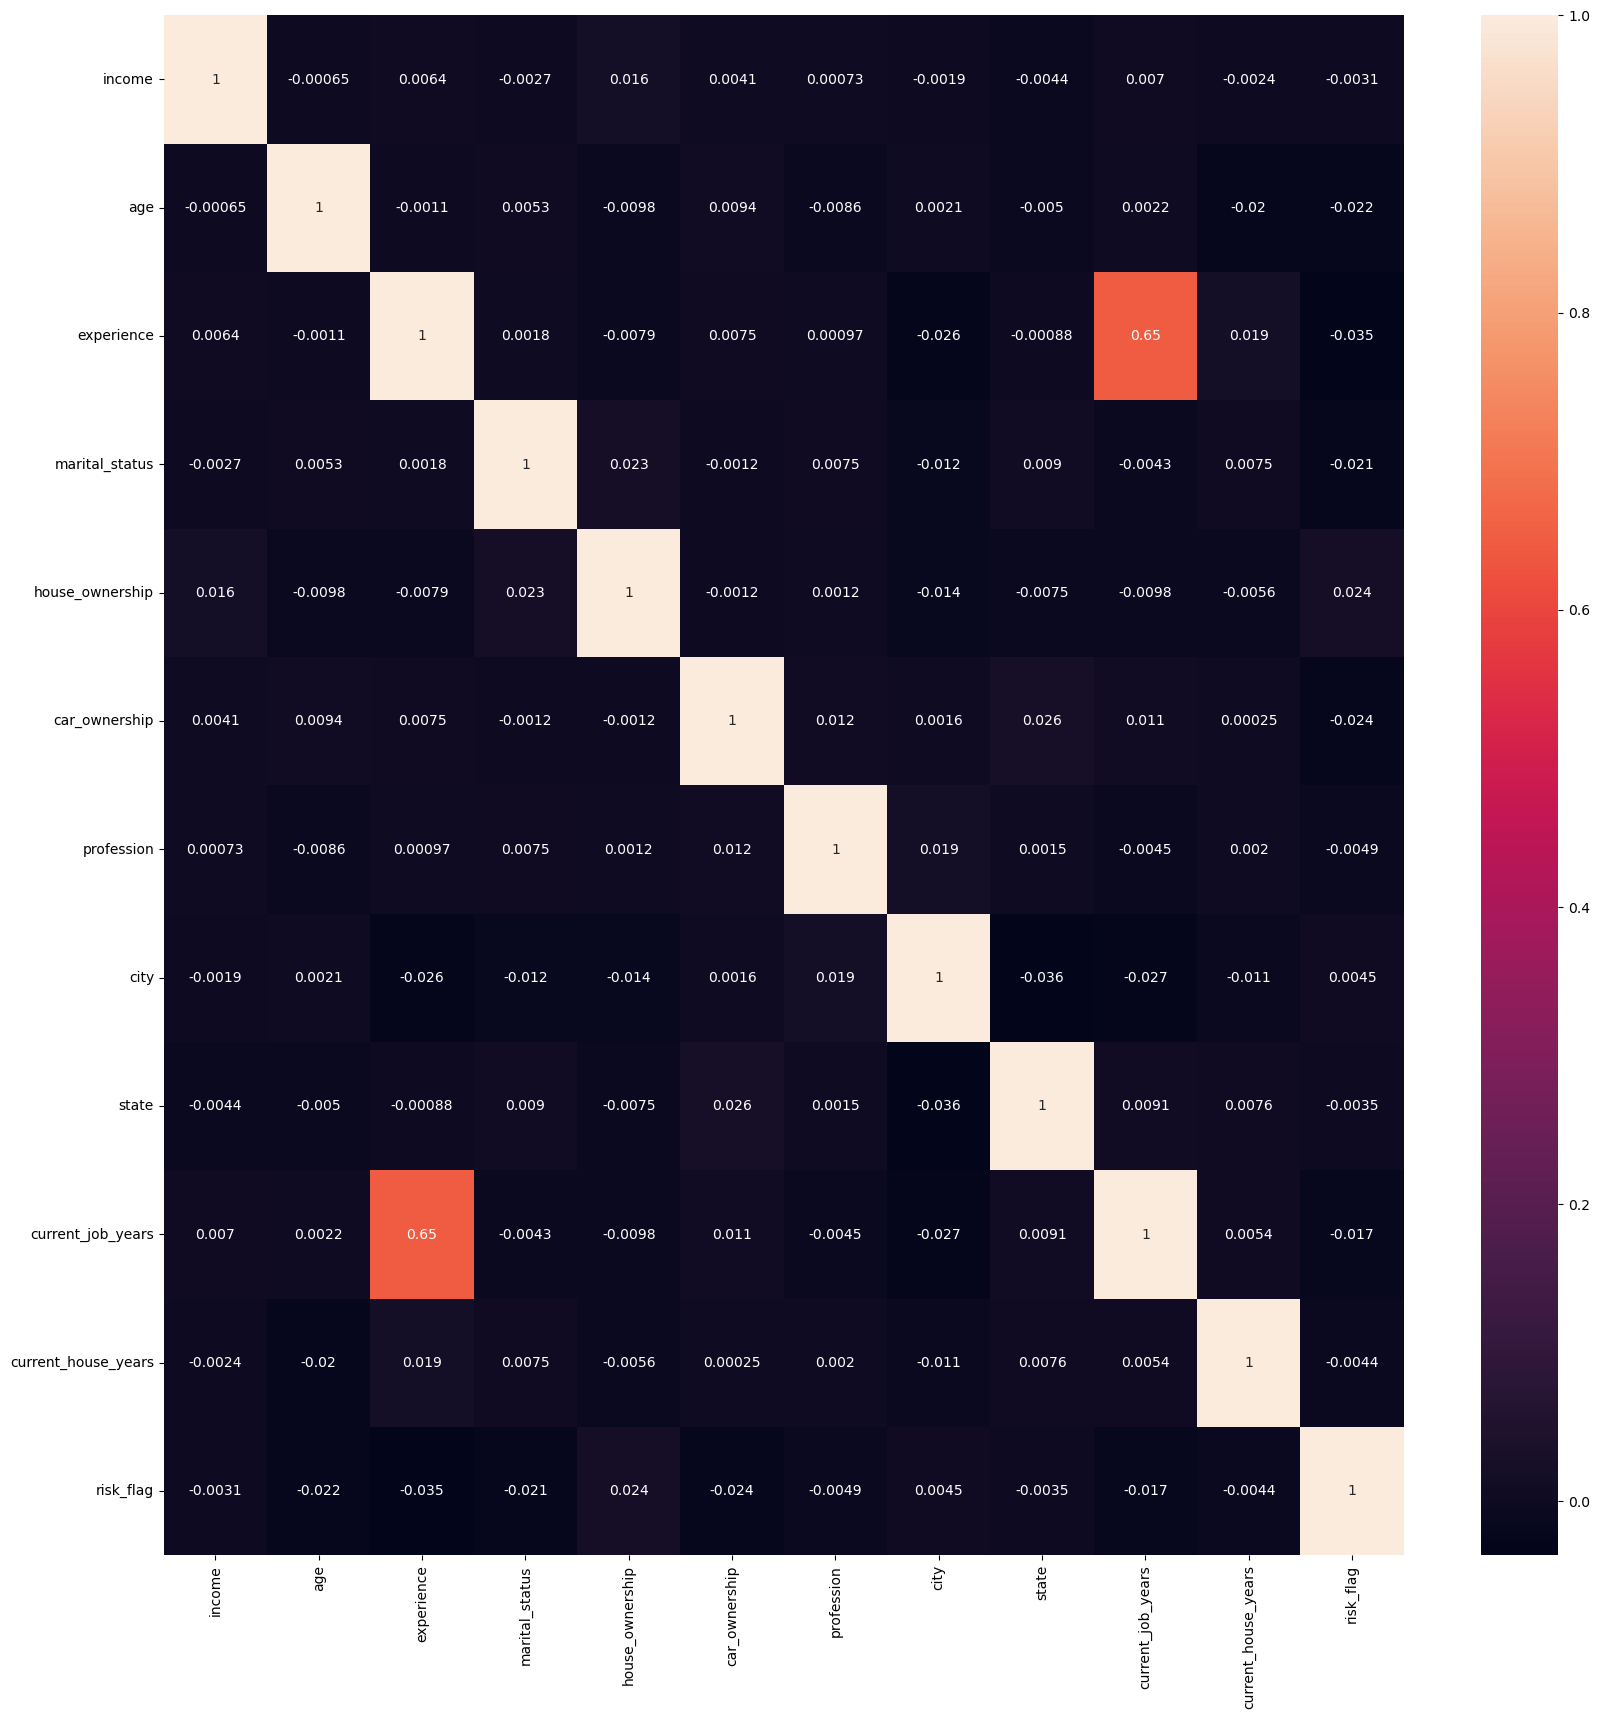

In [33]:
#now we have converted all the categorical values to numeric values\
#now we can proceed to check for multicollinearity
#lets check the correlation matrix

plt.figure(figsize=(20,20))
sns.heatmap(df_dt.corr(),annot=True)
plt.show()

# we can understand In summary, the risk_flag variable shows very weak correlations with 
# all the other variables in your dataset. 
# The strongest correlations are with experience, age, and car_ownership
# but these are linear correlations. there may be non linear correlations as well

In [34]:
df_train=df_dt.copy()
from sklearn.model_selection import train_test_split
X, y = df_train.drop ('risk_flag', axis=1).values , df_train.risk_flag.values
X_train, X_test, y_train, y_test = train_test_split ( X, y,

                                                     test_size = 0.3,
                                                     random_state = 1,
                                                     stratify = y)

In [35]:
from imblearn.over_sampling import SMOTE
import numpy as np

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

smt = SMOTE ()
X_train, y_train = smt.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )

Number of observations in the target variable before oversampling of the minority class: [154703  21697]

Number of observations in the target variable after oversampling of the minority class: [154703 154703]


In [36]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


tree = DecisionTreeClassifier ( random_state = 1 )
tree.fit ( X_train_std, y_train )
y_pred = tree.predict ( X_test_std )
print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred ) )


Accuracy score: 0.86
Roc_Auc score: 0.86


In [38]:
#lets check the confusion matrix
print(confusion_matrix(y_test,y_pred))


#lets check the classification report


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))



[[57441  8860]
 [ 1393  7906]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     66301
           1       0.47      0.85      0.61      9299

    accuracy                           0.86     75600
   macro avg       0.72      0.86      0.76     75600
weighted avg       0.91      0.86      0.88     75600



In [39]:

from sklearn.model_selection import GridSearchCV
# range of parameter values
split_range = [ 8, 10 ]
# parameters grid
grid_param = [
    { 'criterion' : [ 'entropy', 'gini' ],
     'splitter' : [ 'best', 'random' ],
     'min_samples_split' : split_range }
]
gs = GridSearchCV ( estimator = tree,
                   param_grid = grid_param,
                   scoring = 'roc_auc',
                   cv = 3,
                   refit = True,
                   n_jobs = 4
                   )

gs = gs.fit ( X_train, y_train )

print ( 'Best hyperparameter:', gs.best_params_ )

print ( 'Best score: %.3f' %gs.best_score_ )

gs = gs.best_estimator_

Best hyperparameter: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
Best score: 0.922


In [40]:

gs.fit ( X_train_std, y_train )
y_pred_gs = gs.predict ( X_test_std )
print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred_gs ) )
print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred_gs ) )


print(confusion_matrix(y_test,y_pred_gs))

print(classification_report(y_test,y_pred_gs))


Accuracy score: 0.86
Roc_Auc score: 0.86
[[57301  9000]
 [ 1373  7926]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     66301
           1       0.47      0.85      0.60      9299

    accuracy                           0.86     75600
   macro avg       0.72      0.86      0.76     75600
weighted avg       0.91      0.86      0.88     75600



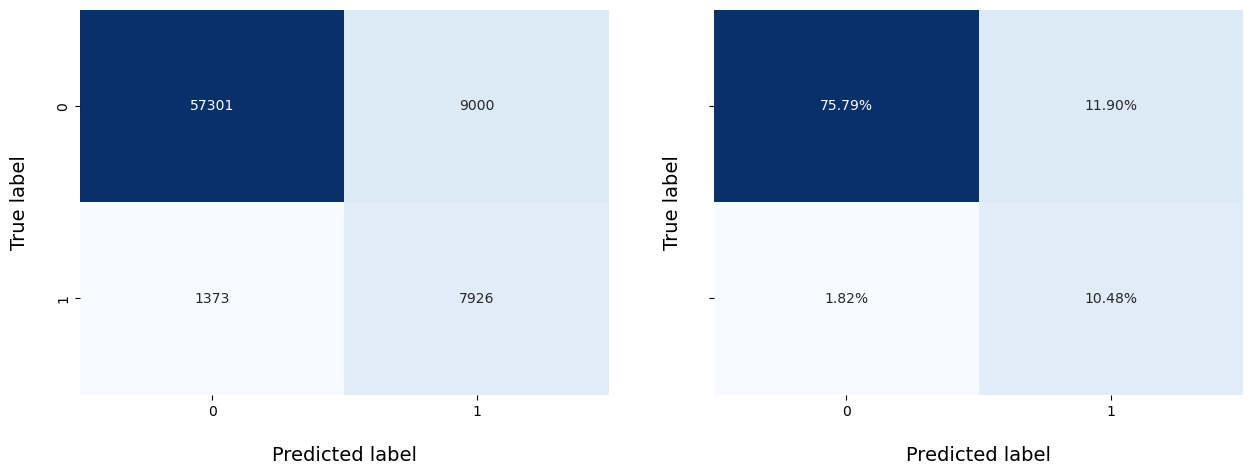

In [41]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (  y_test, y_pred_gs )

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()


In [42]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve ( gs,
                                                            X_train_std,
                                                            y_train,
                                                            cv = 5,
                                                            scoring = 'roc_auc',
                                                            n_jobs = -1,
                                                            train_sizes = np.linspace ( 0.01, 1, 50 ),
                                                            verbose = 1 )

train_mean = np.mean ( train_scores, axis = 1 )

train_std = np.std ( train_scores, axis = 1 )

test_mean = np.mean ( test_scores, axis = 1 )

test_std = np.std ( test_scores, axis = 1 )



[learning_curve] Training set sizes: [  2475   7476  12477  17478  22479  27480  32481  37482  42483  47484
  52485  57486  62487  67488  72489  77490  82491  87492  92493  97494
 102495 107496 112497 117498 122499 127500 132501 137502 142503 147504
 152505 157506 162507 167508 172509 177510 182511 187512 192513 197514
 202515 207516 212517 217518 222519 227520 232521 237522 242523 247524]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 73, in _get_response_values
    prediction_method = _check_response_met

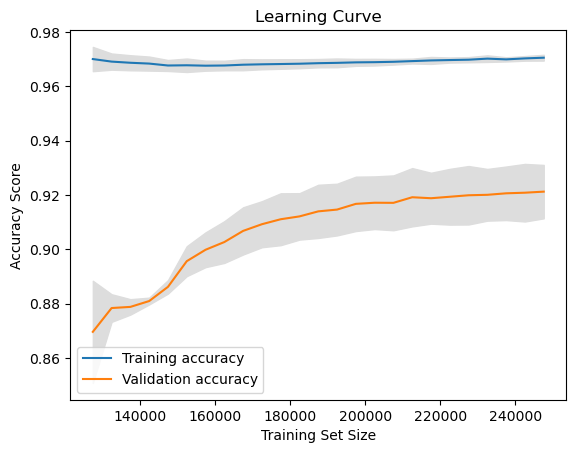

In [43]:
plt.plot ( train_sizes, train_mean, label = 'Training accuracy' )

plt.plot ( train_sizes, test_mean, label = 'Validation accuracy' )

plt.fill_between ( train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD' )

plt.fill_between ( train_sizes, test_mean - test_std, test_mean + test_std, color = '#DDDDDD' )

plt.title ( 'Learning Curve' )

plt.xlabel ( 'Training Set Size' )

plt.ylabel ( 'Accuracy Score' )

plt.legend ( loc = 'best' )

plt.show ()


In [44]:
df_train=df_lr.copy()
from sklearn.model_selection import train_test_split
X, y = df_train.drop ('risk_flag', axis=1).values , df_train.risk_flag.values
X_train, X_test, y_train, y_test = train_test_split ( X, y,
                                                     test_size = 0.3,
                                                     random_state = 1,
                                                     stratify = y)

from imblearn.over_sampling import SMOTE
import numpy as np

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

smt = SMOTE ()

X_train, y_train = smt.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_std = std_scaler.fit_transform ( X_train )

X_test_std = std_scaler.transform ( X_test )



Number of observations in the target variable before oversampling of the minority class: [154703  21697]

Number of observations in the target variable after oversampling of the minority class: [154703 154703]


In [45]:
# logistic regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression ( penalty = 'l2',
                            C = 1.0,
                            solver = 'liblinear',
                            random_state = 1 )

lr.fit ( X_train_std, y_train )

y_pred = lr.predict ( X_test_std )

print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred ) )

print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred ) )

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))



Accuracy score: 0.57
Roc_Auc score: 0.59
[[37742 28559]
 [ 3601  5698]]
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     66301
           1       0.17      0.61      0.26      9299

    accuracy                           0.57     75600
   macro avg       0.54      0.59      0.48     75600
weighted avg       0.82      0.57      0.65     75600



In [46]:
#hyperparameter tuning for logistic regression model using random search cv

from sklearn.model_selection import RandomizedSearchCV

# range of parameter values

C_range = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0 ]

penalty_options = [ 'l1', 'l2' ]

solver_options = [ 'liblinear', 'saga' ]

# parameters grid

grid_param = [
    { 'penalty' : penalty_options,
     'C' : C_range,
     'solver' : solver_options }
]

rs = RandomizedSearchCV ( estimator = lr,
                         param_distributions = grid_param,
                         scoring = 'roc_auc',
                         cv = 3,
                         refit = True,
                         n_jobs = 4,
                         n_iter = 10,
                         random_state = 1
                         )

rs = rs.fit ( X_train_std, y_train )

print ( 'Best hyperparameter:', rs.best_params_ )

print ( 'Best score: %.3f' %rs.best_score_ )

rs = rs.best_estimator_







/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pramithajayasooriya/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

Best hyperparameter: {'solver': 'saga', 'penalty': 'l2', 'C': 0.001}
Best score: 0.639


In [47]:
rs.fit ( X_train_std, y_train )

y_pred_rs = rs.predict ( X_test_std )

print ( 'Accuracy score: %.2f' %accuracy_score ( y_test, y_pred_rs ) )

print ( 'Roc_Auc score: %.2f' %roc_auc_score ( y_test, y_pred_rs ) )

print(confusion_matrix(y_test,y_pred_rs))

print(classification_report(y_test,y_pred_rs))



Accuracy score: 0.57
Roc_Auc score: 0.59
[[37681 28620]
 [ 3589  5710]]
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     66301
           1       0.17      0.61      0.26      9299

    accuracy                           0.57     75600
   macro avg       0.54      0.59      0.48     75600
weighted avg       0.82      0.57      0.65     75600



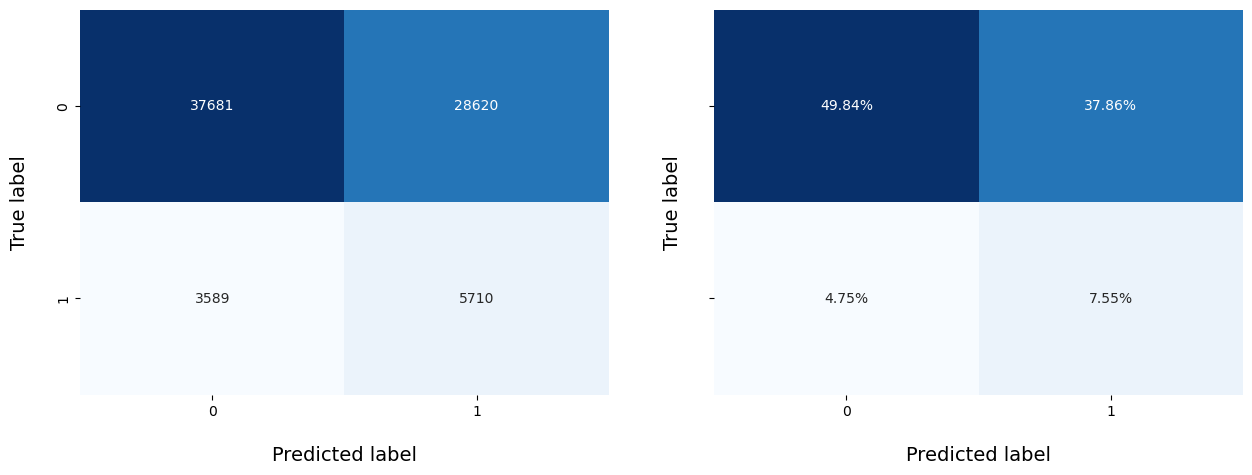

In [48]:

#plotting the confusion matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix (  y_test, y_pred_rs )

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

#plot 1

sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')

axes[0].set_xlabel('\nPredicted label', size = 14)

axes[0].set_ylabel('True label\n', size = 14)

# plot 2

sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True,
            
            fmt='.2%', cmap='Blues', cbar=False)

axes[1].set_xlabel('\nPredicted label', size = 14)

axes[1].set_ylabel('True label\n', size = 14)

axes[1].yaxis.tick_left()

plt.show()




(0.0, 1.0)

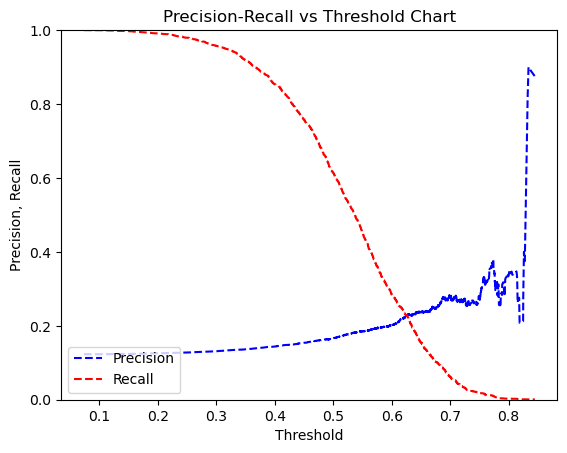

In [50]:
test_x = X_test_std
pred_y=rs.predict(test_x)

from sklearn import metrics

probs_y=rs.predict_proba(test_x) 

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")

plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [57]:
#change threshold to 0.5

threshold = 0.64
pred_y = np.where(rs.predict_proba(test_x)[:,1] > threshold, 1, 0)

print(confusion_matrix(y_test,pred_y))

print(classification_report(y_test,pred_y))






[[60655  5646]
 [ 7600  1699]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     66301
           1       0.23      0.18      0.20      9299

    accuracy                           0.82     75600
   macro avg       0.56      0.55      0.55     75600
weighted avg       0.81      0.82      0.82     75600



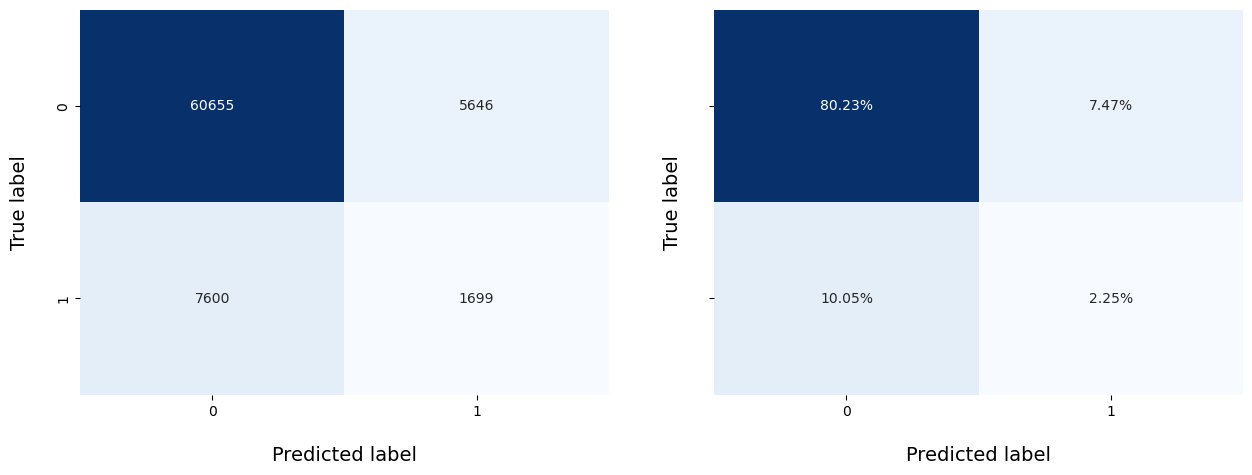

In [58]:
# draw confusion matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix (  y_test, pred_y )

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

#plot 1

sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')

axes[0].set_xlabel('\nPredicted label', size = 14)

axes[0].set_ylabel('True label\n', size = 14)

# plot 2

sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True,
            
            fmt='.2%', cmap='Blues', cbar=False)

axes[1].set_xlabel('\nPredicted label', size = 14)

axes[1].set_ylabel('True label\n', size = 14)

axes[1].yaxis.tick_left()

plt.show()







In [59]:
# learning curve

from sklearn.model_selection import learning_curve

import numpy as np

train_sizes, train_scores, test_scores = learning_curve ( rs,
                                                         
                                                            X_train_std,
                                                            
                                                            y_train,
                                                            
                                                            cv = 5,
                                                            
                                                            scoring = 'roc_auc',
                                                            
                                                            n_jobs = -1,
                                                            
                                                            train_sizes = np.linspace ( 0.01, 1, 50 ),
                                                            
                                                            verbose = 1 )

train_mean = np.mean ( train_scores, axis = 1 ) 

train_std = np.std ( train_scores, axis = 1 )

test_mean = np.mean ( test_scores, axis = 1 )

test_std = np.std ( test_scores, axis = 1 ) 






[learning_curve] Training set sizes: [  2475   7476  12477  17478  22479  27480  32481  37482  42483  47484
  52485  57486  62487  67488  72489  77490  82491  87492  92493  97494
 102495 107496 112497 117498 122499 127500 132501 137502 142503 147504
 152505 157506 162507 167508 172509 177510 182511 187512 192513 197514
 202515 207516 212517 217518 222519 227520 232521 237522 242523 247524]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 146.1min finished


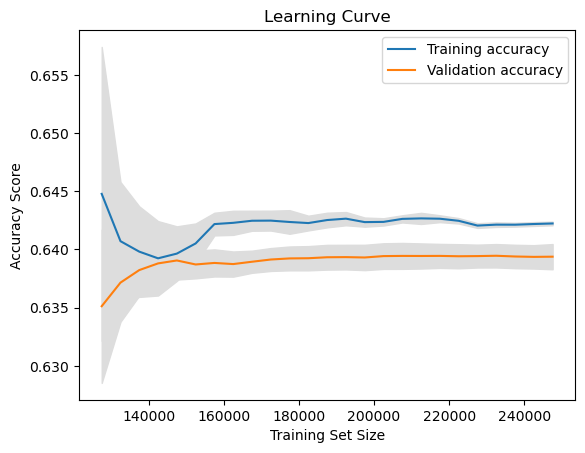

In [60]:
plt.plot ( train_sizes, train_mean, label = 'Training accuracy' )

plt.plot ( train_sizes, test_mean, label = 'Validation accuracy' )

plt.fill_between ( train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD' )

plt.fill_between ( train_sizes, test_mean - test_std, test_mean + test_std, color = '#DDDDDD' )


plt.title ( 'Learning Curve' )

plt.xlabel ( 'Training Set Size' )

plt.ylabel ( 'Accuracy Score' )

plt.legend ( loc = 'best' )

plt.show ()

